<font size=5> Group06: Genin Victor, Raskin Florent, Rimez Dany

<font size=5  color=#003366> [LGBIO2050] - Medical Imaging <br><br> 
MR Simulation and Region Growing  </font> <br><br><br>

<font size=5  color=#003366>
Prof. G. Kerckhofs <br>
Prof. J. Lee <br>
Prof. B. Macq <br>
Prof. F. Peeters
<br><br>
Anne-Sophie Collin (anne-sophie.collin@uclouvain.be)<br> 
Damien Dasnoy-Sumell (damien.dasnoy@uclouvain.be)
<div style="text-align: right"> 2020-2021 </div>
<br><br>
</font>


<font size=5 color=#009999> **1. Guidelines and Deliverables** </font> <br> <br>
   - This assignment is due on **The 18th December 2020**.
   - Copying code or answers from other groups (or from the internet) is strictly forbidden. Each source of inspiration must be clearly indicated.
   - The jupyter notebook containing the code and **detailed answers** to the questions must be delivered in an
archive (.zip folder) on Moodle. The answers have to be written in English.<br> <br>

<font size=5 color=#009999> **2. Context and objectives** </font> <br> <br>

The purpose of this challenge is to simulate an MRI scanner acquisition, and then to segment a lesion in the brain using a pair of MRI images, one in proton density contrast and one in T1 weighted contrast. The T1 image comes directly from the scanner and as you know, MRI scanner acquire data in the frequency space, so you will need to reconstruct the image using the frequency data. Once you have both images, you will segment the lesion on both using the region growing method and compute the intersection in order to get a better contour of the lesion. 

![FIGURE 1](imgs/ProtonDensity.png "Proton density image")
<br>
<center>Figure 1: Proton density image.</center>

<font size=5 color=#009999> **3. MR Simulation** </font> <br>
To understand exactly how magnetic resonance imaging works, we ask you to simulate the behavior of a MR scanner and to recreate an image based on your simulated signal. In order to do this, you will have to complete the following tasks:

Examine and understand the equations of the behavior of MR imaging (section 4.2 of the course notes).
In particular, look at the following equation:
 
\begin{equation}
S(k_x,k_y) = \int\int\rho(x,y)e^{-i2\pi(k_xx+k_yy)}dxdy\qquad(1)
\end{equation}

<div class="alert alert-info">
<b>QUESTION 1</b>  <br>
First, load the 2 image data and plot them. Then, implement a script simulating the equations of the behavior of the MR scanner for a spin echo pulse sequence. In such sequences, $Gy = m∆Gy$ with $m ∈ \mathbb{Z}$. Knowing that the FOV (W) is of 256 mm in $x$ and $y$ and that the pixel resolution is of 1 mm, choose the parameters of the MR equipment $(γ, Gx,∆Gy, ∆t, Ty$ --> see hints here under) to be consistent with equations [4.41] and [4.42] of the notes. Using equation (1), you can now compute the matrix $S(k_x,k_y)$ taking the proton density image as $ρ(x, y)$ to simulate a real patient in an MRI scanner. Since you have all discrete values, the integration can actually be computed as a sum for all $x$ and $y$ values. What do $k_x$ and $k_y$ correspond to?
<br><br>
Hints: 
- Gradient amplitude are of the order of 10mT/m (for Gy and Gx) 
- Ty --> order of milliseconds 
- dt --> order of microseconds
</div>

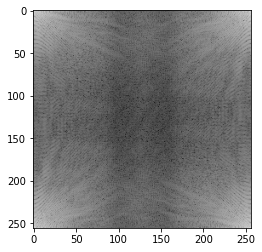

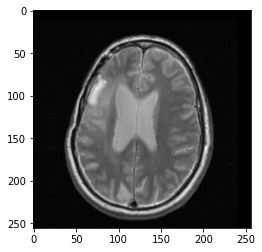

In [ ]:
## Load the 2 image data and plot them 

import numpy as np
from skimage.io import imread
from skimage.transform import resize
from scipy.io import loadmat
import matplotlib.pyplot as plt

t1ImageFreq = loadmat('T1_raw.mat')['S']
protonDensityImage = imread('ProtonDensity.png').astype(np.float64)

plt.imshow(20*np.log10(np.abs(t1ImageFreq)),cmap='gray')
plt.show()
plt.imshow(protonDensityImage,cmap='gray')
plt.show() 

Basing ourselves on the equations:
$$\Delta G_y = \frac{1}{\gamma T_y W_y}$$
$$\Delta t = \frac{1}{\gamma G_x W_x}$$
$$\Delta k_x <= \gamma G_x \Delta t$$
$$\Delta k_y <= \gamma \Delta G_y T_y$$
Where $T_y = 1 ms$, $G_x = G_y = 10 mT/m$ and $W_x = W_y = 0.256 m$. Here if we consider the equation at the limit of the nyquist theorem, we obtain $\Delta k_x = \Delta k_y = \frac{1}{256} mm^{-1}$.

In [ ]:
## Compute the S matrix using MR scanner parameters
 
dkx = 1/256
dky = 1/256
x, _ = np.meshgrid(np.arange(256), np.arange(256))   
y = np.arange(256)
def sim_mr(image):
    ss = np.zeros_like(image)
    S = np.zeros_like(image)
    for kx in range(256): 
        s = np.sum(image[x.T,x]*np.exp(-2*1j*np.pi*(x*(kx-127)*dkx)),axis=1) 
        ss[:,kx] = s
    for kx in range(256):     
        for ky in range(256): 
            S[ky,kx] = np.sum(ss[:,kx]*np.exp(-2*1j*np.pi*(y*(ky-127)*dky)))
    return S

S = sim_mr(protonDensityImage.astype(np.complex64))  

<div class="alert alert-info">
<b>QUESTION 2</b>  <br>
How is equation (1) related to a Fourier transform? By computing the magnitude (abs) of the inverse fast Fourier transform (ifft2) of your simulated signal S, show that you can recover the original image. Apply the same ifft2 function on the T1 raw data to reconstruct the T1 image.
</div>


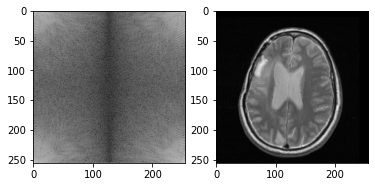

In [ ]:
## Show results
S = np.fft.ifftshift(S)
fig, ax = plt.subplots(1,2)
ax[0].imshow(20*np.log10(np.abs(S)),cmap='gray') 
t1Image = np.abs(np.fft.ifft2(S))
ax[1].imshow(t1Image,cmap='gray')
plt.show()
# Here you can see that we recover the original image:

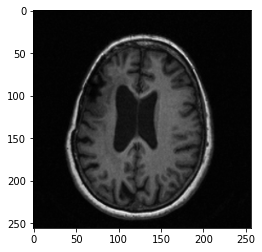

In [ ]:
%matplotlib inline
## get back T1 image from MRI data

t1Image = np.abs(np.fft.ifft2(t1ImageFreq))
plt.imshow(t1Image,cmap='gray')

<div class="alert alert-info">
<b>QUESTION 3</b>  <br>
What would you need to change in order to simulate gradient-echo pulse sequence or the echo-planar pulse sequence?
</div>

**Answer to question 3:**

The gradient-echo pulse sequence is an alternative technique to the spin-echo pulse sequence used in the exercise above. The difference lies in the fact that gradient fields are used to generate transverse magnetization and the flip angles are less than 90° for the gradient-echo pulse sequence. A dephasing phase shift has to be added. Here it implies to variate Gx while keeping Gy constant. The echo-planar pulse sequence is the fastest aquisition method but has a limited spatial resolution. It allows to encode all spatial information after a single excitation.

**Sources:**

Bashir, Usman. « Gradient Echo Sequences | Radiology Reference Article | Radiopaedia.Org ». Radiopaedia. Consulted on the 10th of decembre 2020. https://radiopaedia.org/articles/gradient-echo-sequences-1.

Bashir, Usman. « Echo Planar Imaging | Radiology Reference Article | Radiopaedia.Org ». Radiopaedia. Consulted on the 10th of decembre 2020. https://radiopaedia.org/articles/echo-planar-imaging-1.

Frank Peeters course notes



<div class="alert alert-info">
<b>QUESTION 4</b>  <br>
What is the difference between a proton density and a T1 or T2 weighted image?
</div>

**Answer to question 4**:

A proton density weighted image shows the density of hydrogen protons whereas a T1 weighted image show maximum T1 contrast and a T2 weighted image shows maximum T2 contrast. 

For T1 weighted image, T1 is the time constant measuring the time it takes for the nuclei to reach 63% of their original longitudinal magnetisation Mz. Since T1 is different when the hydrogen nuclei are in different molecules, we can say that T1 wieghted imaging depends on the  magnetic characteristics of the hydrogen nuclei. In practice, we obtain a T1 weighted image by using a short repetition time TR and a short echo time TE. The image will then show, for example, the white matter brighter then the grey matter in the brain. Indeed, for a short TE, T2 effects will not be seen on the image.

For T2 weighted image, T2 is the time constant measuring the time it takes for the nuclei to decay to 37% of their transverse magnetisation Mxy. Since T2 is different when the hydrogen nuclei arein different molecules, we can say that T1 wieghted imaging depends on the  magnetic characteristics of the hydrogen nuclei. In practice, we obtain a T2 weighted image by using a long repetition time TR and a long echo time TE. Indeed, for a long TR time, T1 effects will not be seen on the image.

For proton density weighted image, on the other hand, it is the number of hydrogen nuclei that are being displayed, not the magnetic characteristics of the hydrogen nuclei. In practice, we obtain a proton density weighted image by using a long repetition time TR and a short echo time TE so that the effects of T1 and T2 are not seen on the image. The higher the density of protons, the higher the transverse magnetisation and thus the higher the signal. On the image, high proton density will thus be represented by brighter areas whereas the lower proton density areas will be darker on the image.

**Sources:**

Abdullah, Sarah. « T1, T2 and PD Weighted Imaging ». Radiology Cafe. Consulté le 10 décembre 2020. https://www.radiologycafe.com/radiology-trainees/frcr-physics-notes/t1-t2-and-pd-weighted-imaging.

Frank Peeters course notes

<font size=5 color=#009999> **4. Region growing segmentation** </font> <br>

The brain lesion can be seen on both images (left part of the brain, dark on the PD and bright on the T1). However, classification methods are not really suitable to segment it, as lesion intensities are similar in other parts of the brain. A simple segmentation method called ’region growing’ will be used in this case. The idea is to manually select a seed point (a pixel in the middle of the lesion) and to progressively expand it by taking the pixels which are similar to the segmented pixels according to some criterion. The criterion is usually based on the intensity of the considered pixel (if its intensity is in a small range around the mean intensity of the region, the pixel is added to the region). Additional criteria can be used (as gradient-based criteria, etc.), but these are optional for this challenge. Yet, uncertainties remain because of surrounding tissues of the same intensities. By segmenting the lesion on both images and by taking the union of segmentation (because they were previously registered), you should be able to get a better estimation of the lesion contour.

![FIGURE 1](imgs/RegionGrowing.png "Image to segment")
<br>
Figure 2: Left: PD + segmentation of the lesion. Middle: T1 + segmentation of the lesion. Right: intersection of both segmentations.
<br><br>

<div class="alert alert-info">
<b>QUESTION 5</b>  <br>
Implement a region growing method. You can use the sample picker cell here under to manually select the seeds. Remark: when using the region growing, pay attention not to evaluate a pixel more than one time, otherwise the algorithm will take too much time (for instance, you could store a map checked of 0 (not checked) and 1 (already checked) of the size of the image). An easy way to implement the growing is to use a variable-length vector (typicaly a list in python) containing all pixels that are to be checked. Each time that a pixel is added to the region, add the neighbors of this pixel to the variable-length vector so that these will be checked later. When the vector is empty, the algorithm stops.
</div>

In [ ]:
##Region growing method in pseudo code --> will not execute
'''
seed_pixel = ginput
regionImage(seed_pixel) = 1
checkedImage(seed_pixel) = 1

vector = neighbours_not_checked(seed_pixel)
checkedImage(neighbours_not_checked(seed_pixel)) = 1  
             
while length(vector)>0:
   pixel = vector(0)
   if(criterion(pixel)):
      region(pixel) = 1
      vector += neighbors_not_checked(pixel)
      checkedImage(neighbors_not_checked(pixel)) = 1
   vector = vector(1:end)
             
where neighbours_not_checked(pixelPosition) check the checkedImage 
around the pixelPosition to get the uncheck pixels in the neighbourhood 
'''

'\nseed_pixel = ginput\nregionImage(seed_pixel) = 1\ncheckedImage(seed_pixel) = 1\n\nvector = neighbours_not_checked(seed_pixel)\ncheckedImage(neighbours_not_checked(seed_pixel)) = 1  \n             \nwhile length(vector)>0:\n   pixel = vector(0)\n   if(criterion(pixel)):\n      region(pixel) = 1\n      vector += neighbors_not_checked(pixel)\n      checkedImage(neighbors_not_checked(pixel)) = 1\n   vector = vector(1:end)\n             \nwhere neighbours_not_checked(pixelPosition) check the checkedImage \naround the pixelPosition to get the uncheck pixels in the neighbourhood\n'

<IPython.core.display.Javascript object>


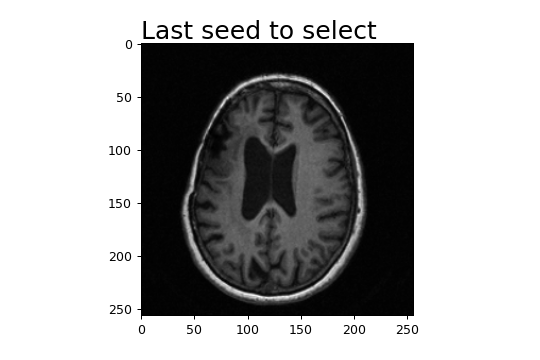

In [ ]:
## ------------- SEED PICKER CELL ------------------------------
## If the figure doesn't show correctly, comment or uncomment one or several of the following '%matplotlib notebook'
## or restart your kernel
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook 
 
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

## ------------------------------------------------------

imageList = [protonDensityImage, t1Image]
currentImageIndex = [0]
seedPosList = []

def onclick(event):
    
    pos = [int(round(event.ydata)), int(round(event.xdata))]
    seedPosList.append(pos)
    currentImageIndex[0] = currentImageIndex[0]+1
    ax.imshow(imageList[currentImageIndex[0]], cmap='gray')
    
    if currentImageIndex[0] == len(imageList)-1:
        text.set_text('Last seed to select')
        
    display.clear_output(wait=True)
    display.display(plt.gcf())
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(imageList[currentImageIndex[0]], cmap='gray')
text=ax.text(0, 0, 'Select a seed', va="bottom", fontsize=20)

cid = fig.canvas.mpl_connect('button_press_event', onclick)  

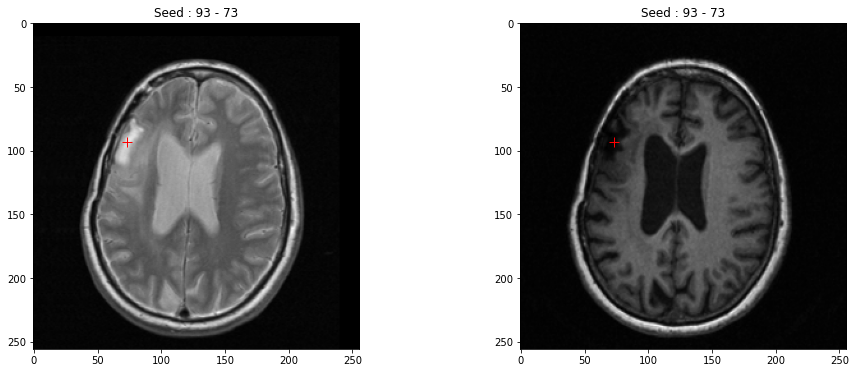

In [ ]:
## To show the selected seeds positions
%matplotlib inline

def showSeedsPos(seedPositionsList, imagesList):
    
    plt.figure(figsize=(16,6))
    
    for imageIndex, image in enumerate(imagesList):
        plt.subplot(1, len(imagesList), imageIndex+1)
        plt.title('Seed : '+str(seedPositionsList[imageIndex][0])+' - '+str(seedPositionsList[imageIndex][1]))
        plt.imshow(image, cmap='gray')
        plt.plot(seedPositionsList[imageIndex][1], seedPositionsList[imageIndex][0], color = 'r', marker="+",  markersize=10)
        
    plt.show()
    
showSeedsPos(seedPosList, imageList)

In [ ]:
## Compute region growing 
def neighbours_not_checked(pixel,checked,intensities,img):
    vec = []
    x,y = pixel
    for i in range(-1,2):
        for j in range(-1,2): 
            if checked[x+i,y+j]==0:  
                vec.append([x+i,y+j])
                checked[x+i,y+j]=1
                intensities += [img[x,y]]            
    return vec                

def regionGrowing(img,seed,tol):  
    region = np.zeros_like(img)
    checkedImage = np.zeros_like(img) 
    intensities = []
    vector = neighbours_not_checked(seed,checkedImage,intensities,img)
    checkedImage[vector[:][0],vector[:][1]] = 1  
             
    seedval = img[seed[0],seed[1]]    
    i = 0      
    while len(vector)>0: 
        pixel = vector[0]
        mean = np.mean(intensities)  
        val = img[pixel[0],pixel[1]]
        if mean-tol<=val and val<=mean+tol:
            region[pixel[0],pixel[1]] = 1
            vector += neighbours_not_checked(pixel,checkedImage,intensities,img) 
        vector = vector[1:] 
        i+=1

    return region        

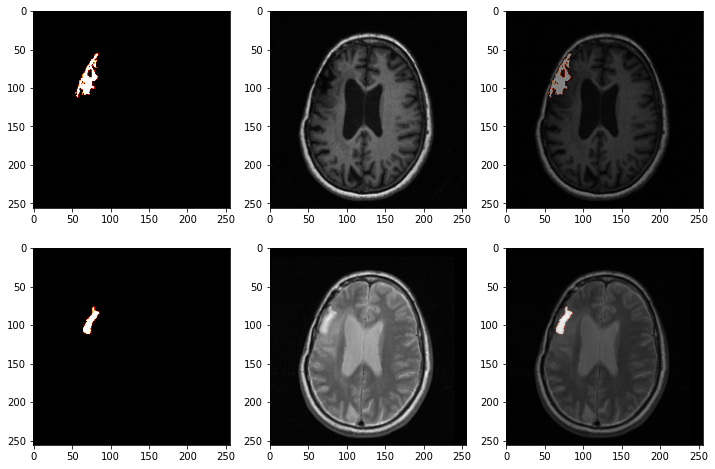

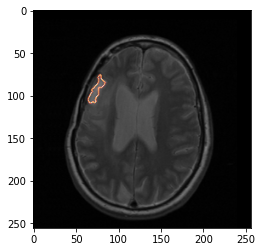

In [ ]:
## Show Results
seedPosList = [[93,73],[93,73]]

# Here we can play with the third argument (tolerance) to tune the efficiency of the algorithm
reg = regionGrowing(t1Image,seedPosList[1],12), regionGrowing(protonDensityImage,seedPosList[0],35) 
imgs = [t1Image,protonDensityImage]

fig, axes = plt.subplots(2,3)
fig.set_size_inches((12,8))
for region,img,ax in zip(reg,imgs,axes):
    ax[0].imshow(region,cmap='gist_heat') 
    ax[1].imshow(img,cmap='gray')
    ax[2].imshow(img,cmap='gray')
    ax[2].imshow(region,cmap='gist_heat',alpha=0.5)
plt.show()  

intersection = np.logical_and(reg[0]==1,reg[1]==1)
final_region = np.zeros_like(reg[0])
final_region[intersection] = 1  
plt.imshow(np.linalg.norm(np.gradient(final_region),axis=0),cmap='gist_heat')
plt.imshow(protonDensityImage,cmap='gray',alpha=0.5) 
plt.show()